In [21]:
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

AttributeError: module 'numpy' has no attribute '__config__'

# Importing the Dataset
First we import the 2 datasets (listings and listings_details)


In [13]:
#import daataset
df_1 = pd.read_csv("DataSets/listings.csv")
df_2 = pd.read_csv("DataSets/listings_details.csv")

NameError: name 'pd' is not defined

In [ ]:
#The full datasets
df_1.head()
df_2.head()

# Merging the Dataset
Since both datasets have variables that are interesting for predicting the rb&b room price,
we linked the datasets together via their primary key: ID

Later we'll use dimensionality reduction since this dataset contains 111 collums which is a bit too much



In [9]:
#merging dataframe 1 and 2
merged_df = pd.merge(df_1,df_2,on="id")


# Deleting meaningless variables

Certain variables are being deleted because we think they wouldn't contribute anything meaningful
in order to predict the price. 

Some of these variables are for example:
<ol>
<li> <b>variables where over 99% had the same value </b></li>
<li><b>Text data<b>                                  </li>
<li><b>Seggregated variables<b>                           </li>
<li><b>Empty variables <b></li>
</ol>


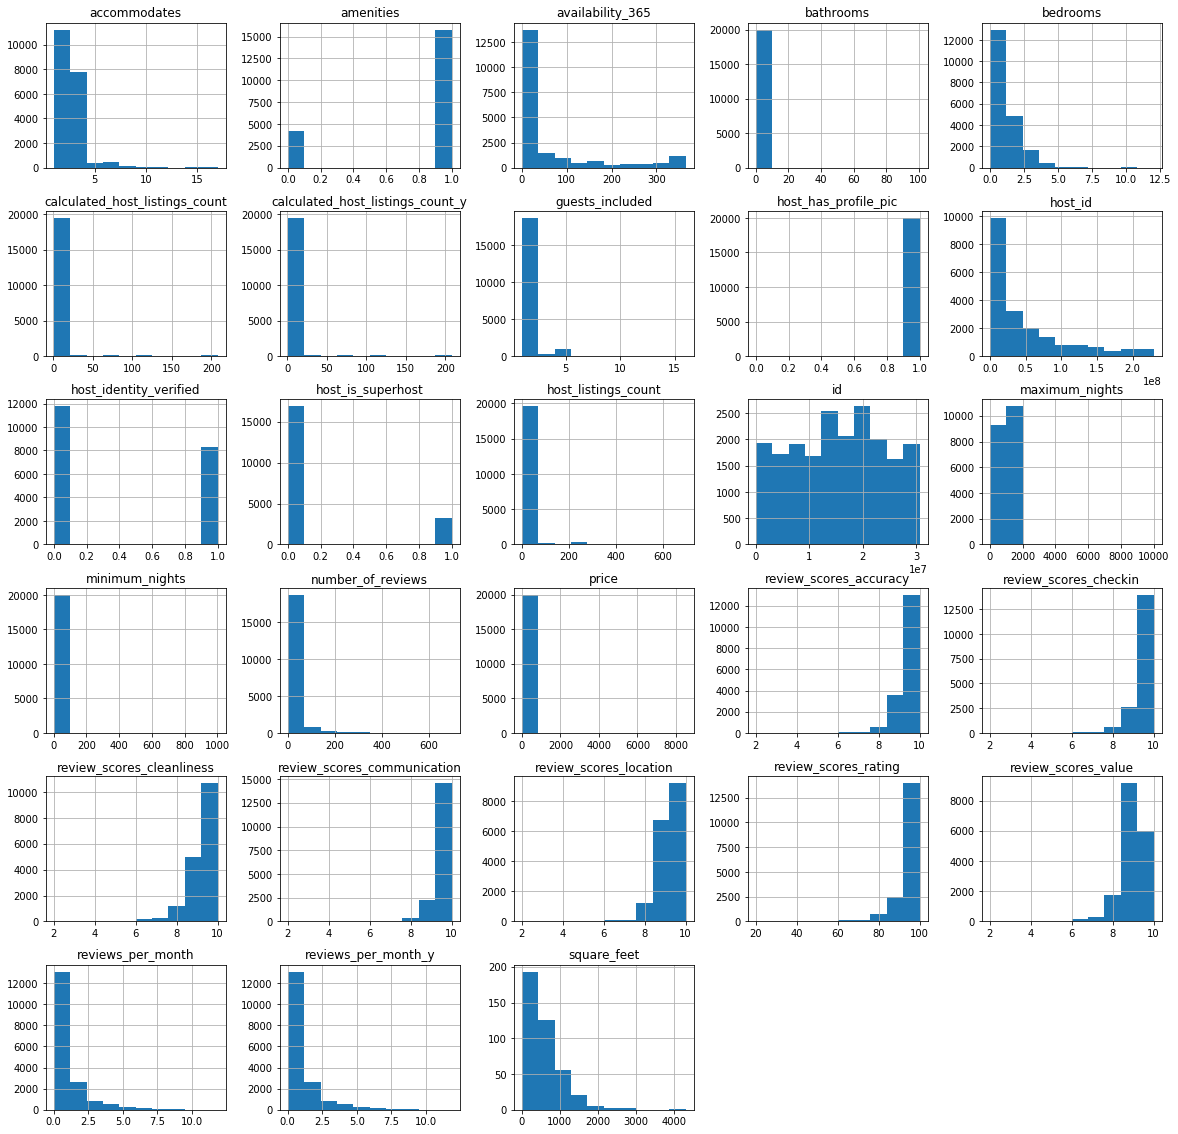

In [23]:
# Checking if some variables have over 99% the same value 
# We'll still keep in mind what each variable means!
merged_df.hist(figsize=(20,20));

In [5]:
#drop duplicate rows
merged_df.drop_duplicates  #if any

#rop unimportant variables
drop_cols = ["neighbourhood_group","latitude_x","longitude_x","listing_url","scrape_id","last_scraped","summary","space","description",
             "experiences_offered","neighborhood_overview","notes","transit","access","interaction","house_rules","thumbnail_url","medium_url",
            "picture_url","xl_picture_url","host_id_y","host_url","host_name_y","host_response_rate","host_acceptance_rate","host_thumbnail_url",
            "host_picture_url","host_neighbourhood","street","neighbourhood_y","neighbourhood_group_cleansed","city","state","zipcode","market",
            "smart_location","country_code","country","latitude_y","longitude_y","is_location_exact","beds","extra_people","calendar_updated",
            "has_availability","availability_30","availability_60","availability_90","calendar_last_scraped","first_review","last_review_y",
            "requires_license","license","jurisdiction_names","instant_bookable","is_business_travel_ready","require_guest_profile_picture",
            "require_guest_phone_verification","name_y"
#noticed later
             ,"name_x","host_name_x","host_about","host_total_listings_count","neighbourhood_cleansed","host_location","host_response_time",
            "room_type_y","price_y","minimum_nights_y","availability_365_y","number_of_reviews_y"]
            

merged_df.drop(drop_cols,axis=1,inplace=True) #inplace = true zorgt ervoor dat je meteen updated





# Polishing Variables

currently we have all the variables, but we'll still need a bit more pre-processing to do.
Some things we thought of are:
- Splitting the dependent variable in a continous and ratio variable (this way we can use both classification models, aswell as regression models)
- Changinging certain string values to numerical values





In [6]:
#renaming the variables without x
merged_df.rename(columns={'name_x': "name", "host_id_x": "host_id", "host_name_x": "host_name","neighbourhood_x": "neighbourhood",
                          "room_type_x":"room_type","price_x":"price","minimum_nights_x":"minimum_nights","number_of_reviews_x":
                          "number_of_reviews","last_reviews_x":"last_reviews","reviews_per_month_x":"reviews_per_month",
                          "calculated_host_listings_count_x":"calculated_host_listings_count","availability_365":"availability_365",
                          "last_review_x":"last_review","availability_365_x" : "availability_365"
                          
                           },inplace=True)
merged_df["last_review"] = merged_df["last_review"].fillna(value="null")
merged_df["host_since"] = merged_df["host_since"].fillna(value="null")

In [7]:
#still need functions for: amneties and verifications

def transform_neighbourhood(x):
    """transforms neighbourhood into 4 categories
        Noord = 1
        East  = 2
        West  = 3
        Zuid  = 4
     """
    if  x.__contains__("Noord"):
        return "Noord"
    if  x.__contains__("Oost"):
        return "Oost"
    if  x.__contains__("Zuid"):
        return "Zuid"
    if  x.__contains__("West"):
        return "West"
    else:
        return "Not Specified"

def transform_last_review(x):
    """transforms neighbourhood into 4 categories
        Old (2000-1017) = 1
        Recent (2018)   = 2
        Missing         = 3
        """
    if  x.__contains__("2005" or"2006" or "2007" or"2008" or "2009" or "2010" or "2011" 
                       "2012" or"2013" or "2014" or"2015" or "2016" or "2017"):
        return "Old (2000-2017)"
    if  x.__contains__("2018"):
        return "Recent (2018)"
    if  x.__contains__("null"):
        return "null"
    else:
        return "Olf (2000-2017)"

def host_since(x):
    """transforms host_since into 4 categories
        Old (2007-2012)      = 1
        Recent (2013-2016)   = 2
        new    (2017-2018)   = 3
        """
    if  x.__contains__("2007" or"2008" or "2009" or "2010" or "2011" or "2012"):      
        return "Experienced (2007-2012)"
    if  x.__contains__("2013" or "2014" or"2015"):
        return "Intermediate(2013-2016)"
    if  x.__contains__("2016" or "2017" or "2018"):
        return "Novice (2016-2018)"
    if  x.__contains__("null"):
        return "Novice (2016-2018)"
    else:
        return "Experienced (2007-2012)"

def tv_internet(x):
    """
    transforms neighbourhood into 4 categories
    discretize if a house has wifi and tv or not
    """
    if  x.__contains__("TV" or "Wifi" or "internet"):
        return 1 #has internet
    else:
        return 0 # no internet

def tv_internet(x):
    """
    transforms neighbourhood into 4 categories
    discretize if a house has wifi and tv or not
    """
    if  x.__contains__("TV" or "Wifi" or "internet"):
        return 1 #has internet
    else:
        return 0 # no internet



In [8]:
#transform neighbourhood into (1 North 2) East 3) South 4) West
merged_df["neighbourhood"] = merged_df["neighbourhood"].apply(transform_neighbourhood)

#transform last_review to 1) old, 2) recent, 3) missing
merged_df["last_review"] = merged_df["last_review"].apply(transform_last_review)

#transform host_since to 1) experienced 2) recent 3) new
merged_df["host_since"] = merged_df["host_since"].apply(host_since)

#discrteize amenities (tv or internet) yes or no
merged_df["amenities"] = merged_df["amenities"].apply(tv_internet)



In [10]:
#the float ones have missing data
merged_df.head()


,id,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count_y,reviews_per_month_y
0,2818,3159,Oost,Private room,59,3,248,Recent (2018),2.10,1,...,97.0,10.0,10.0,10.0,10.0,9.0,10.0,strict_14_with_grace_period,1,2.10
1,3209,3806,West,Entire home/apt,160,4,42,Recent (2018),1.03,1,...,96.0,10.0,9.0,10.0,10.0,9.0,9.0,moderate,1,1.03
2,20168,59484,Oost,Entire home/apt,80,1,233,Recent (2018),2.18,2,...,87.0,9.0,10.0,9.0,9.0,10.0,9.0,strict_14_with_grace_period,2,2.18
3,25428,56142,West,Entire home/apt,125,14,1,Recent (2018),0.09,2,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,strict_14_with_grace_period,2,0.09
4,27886,97647,West,Private room,150,2,171,Recent (2018),2.03,1,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,strict_14_with_grace_period,1,2.03


In [ ]:
merged_df.to_csv("Merged_Data.csv",index = False)

In [6]:
df_2["host_since"]

0        2008-09-24
1        2008-10-24
2        2009-12-02
3        2009-11-20
4        2010-03-23
            ...    
20025    2014-03-22
20026    2012-01-11
20027    2016-08-04
20028    2012-01-11
20029    2015-02-04
Name: host_since, Length: 20030, dtype: object

In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 0 to 20029
Columns: 111 entries, id to reviews_per_month_y
dtypes: float64(25), int64(19), object(67)
memory usage: 17.1+ MB


In [3]:
urlpic = df_2["host_picture_url"]

In [5]:
urlpic.to_csv("images_of_host",index = False)

D:\PythonGuide\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 96 columns):
id                                  20030 non-null int64
listing_url                         20030 non-null object
scrape_id                           20030 non-null int64
last_scraped                        20030 non-null object
name                                19992 non-null object
summary                             19510 non-null object
space                               14579 non-null object
description                         19906 non-null object
experiences_offered                 20030 non-null object
neighborhood_overview               13257 non-null object
notes                               9031 non-null object
transit                             13635 non-null object
access                              12227 non-null object
interaction                         11974 non-null object
house_rules                         12571 non-null object
thumbnail_url           